In [1]:
library(Seurat)
library(Signac)
library(magrittr)
library(ggplot2)
library(BiocIO)
library(genomation)
library(Rsamtools)
library(parallel)
library(foreach)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: grid

Warning message:
“replacing previous import ‘Biostrings::pattern’ by ‘grid::pattern’ when loading ‘genomation’”
Loading required package: GenomeInfoDb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    a

Specify file paths

In [2]:
names.sample = c("A0011",
                 "C0019",
                 "C0026",
                 "C0024",
                 "C0027",
                 "C0021",
                 "A0028",
                 "A0019",
                 "A0024",
                 "A0029",
                 "C0013",
                 "C0014",
                 "A0030",
                 "A0031",
                 "A0033",
                 "A0021",
                 "A0027",
                 "C0022",
                 "C0023",
                 "C0025")

paths.meta = c("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1613/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1608/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1695/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1605/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1696/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1150/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1138/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1134/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1145/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1139/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1141/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1142/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1500/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1499/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1501/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1609/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1612/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1498/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1503/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1606/outs/per_barcode_metrics.csv")

paths.matrix = c("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1613/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1608/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1695/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1605/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1696/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1150/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1138/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1134/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1145/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1139/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1141/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1142/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1500/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1499/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1501/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1609/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1612/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1498/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1503/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1606/outs/raw_feature_bc_matrix/")

paths.fragments = c("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1613/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1608/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1695/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1605/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1696/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1150/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1138/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1134/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1145/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1139/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1141/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1142/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1500/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1499/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1501/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1609/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1612/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1498/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1503/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1606/outs/atac_fragments.tsv.gz")


Import meta data

In [3]:
list.meta = list()
for (n.tmp in 1:length(names.sample)) {
  meta.tmp =
    read.csv(paths.meta[n.tmp],
             stringsAsFactors = F)
  meta.tmp$sample = names.sample[n.tmp]
  meta.tmp$sample_barcode = paste(names.sample[n.tmp],
                                  meta.tmp$barcode,
                                  sep = "_")
  list.meta[[names.sample[n.tmp]]] = meta.tmp
  rm(meta.tmp)
}
meta.merge = do.call(rbind,list.meta)
row.names(meta.merge) = meta.merge$sample_barcode
rm(list.meta)

Import matrix

In [4]:
list.matrix = list()
for (n.tmp in 1:length(names.sample)) {
  matrix.tmp = Read10X(data.dir = paths.matrix[n.tmp])
  colnames(matrix.tmp$`Gene Expression`) =
    paste(names.sample[n.tmp],
          colnames(matrix.tmp$`Gene Expression`),
          sep = "_")
  colnames(matrix.tmp$Peaks) =
    paste(names.sample[n.tmp],
          colnames(matrix.tmp$Peaks),
          sep = "_")
  list.matrix[[names.sample[n.tmp]]] = matrix.tmp
  rm(matrix.tmp)
}

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a 

In [5]:
bc.qc = meta.merge[meta.merge$is_cell == 1,"sample_barcode"]

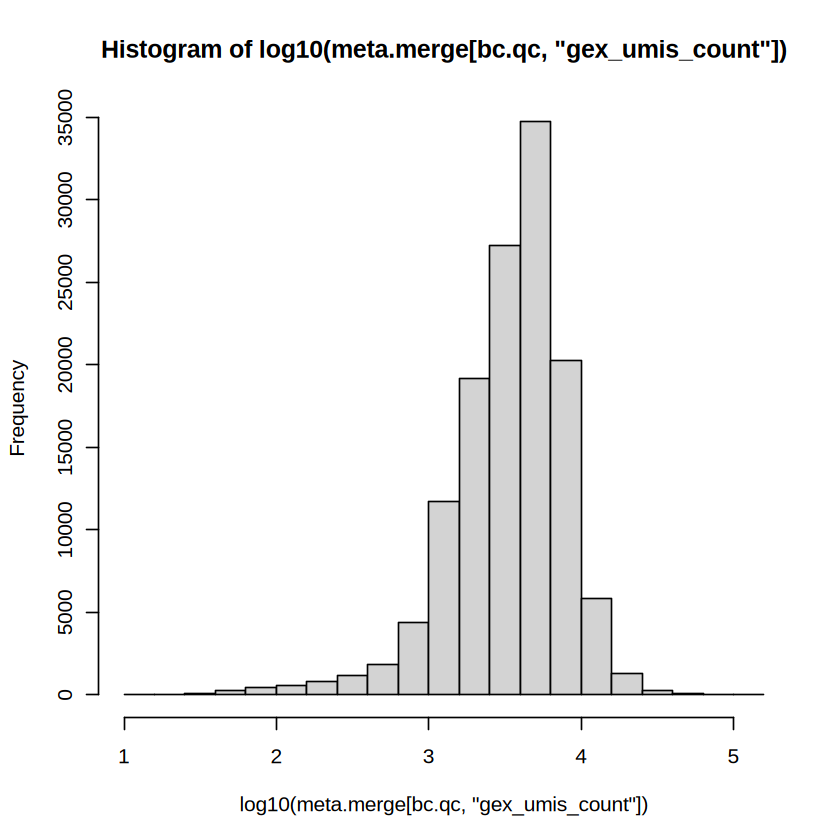

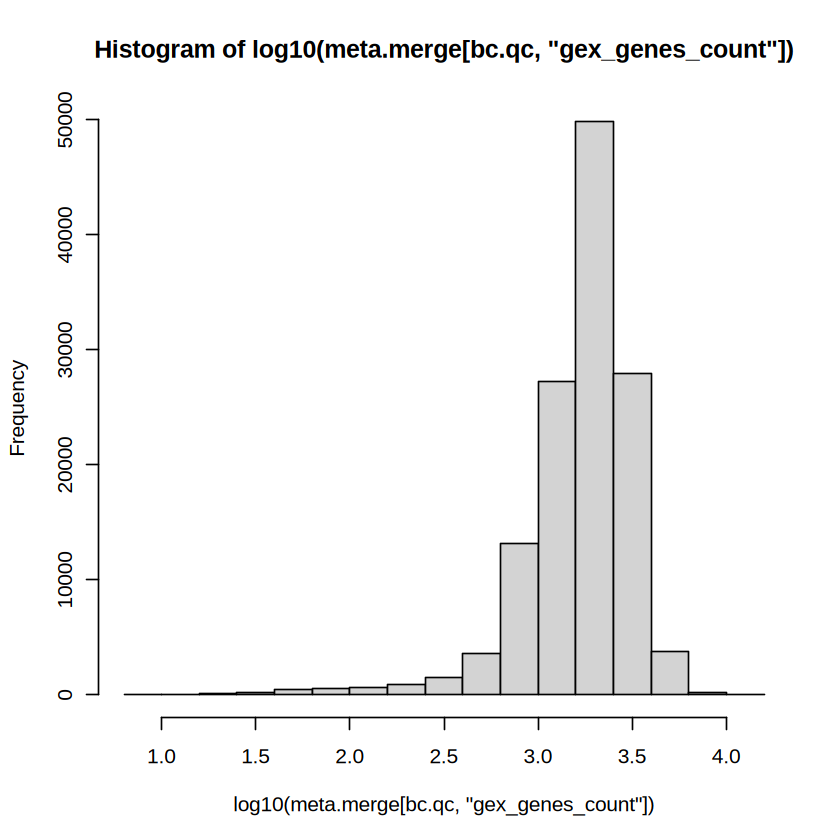

In [6]:
hist(log10(meta.merge[bc.qc,"gex_umis_count"]))
hist(log10(meta.merge[bc.qc,"gex_genes_count"]))

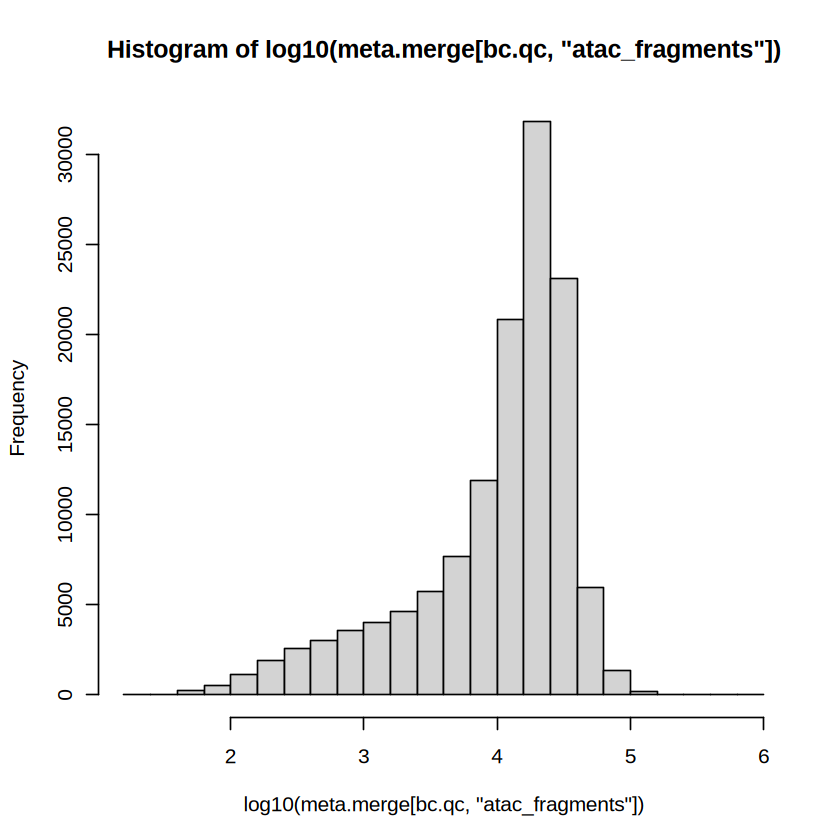

In [7]:
hist(log10(meta.merge[bc.qc,"atac_fragments"]))

In [8]:
bc.qc.filter = bc.qc[log10(meta.merge[bc.qc,"gex_umis_count"]) > 3 &
                         log10(meta.merge[bc.qc,"atac_fragments"]) > 3]
length(bc.qc.filter)

[1] 108992

In [9]:
meta.merge.filter = meta.merge[bc.qc.filter,]
dim(meta.merge.filter)
meta.merge.filter

[1] 108992     33

,barcode,gex_barcode,atac_barcode,is_cell,excluded_reason,gex_raw_reads,gex_mapped_reads,gex_conf_intergenic_reads,gex_conf_exonic_reads,gex_conf_intronic_reads,⋯,atac_lowmapq,atac_dup_reads,atac_chimeric_reads,atac_mitochondrial_reads,atac_fragments,atac_TSS_fragments,atac_peak_region_fragments,atac_peak_region_cutsites,sample,sample_barcode
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
A0011_AAACAGCCACAGCCTG-1,AAACAGCCACAGCCTG-1,AAACAGCCACAGCCTG-1,ACAGCGGGTATTGAGG-1,1,0,13130,12517,644,2563,8934,⋯,3577,13429,33,176,20265,7478,7968,14780,A0011,A0011_AAACAGCCACAGCCTG-1
A0011_AAACAGCCACTAGGTC-1,AAACAGCCACTAGGTC-1,AAACAGCCACTAGGTC-1,ACAGCGGGTCCTTTAT-1,1,0,27548,26446,2280,5893,17429,⋯,3950,20422,30,5,31030,12540,15958,29723,A0011,A0011_AAACAGCCACTAGGTC-1
A0011_AAACAGCCAGGCATGA-1,AAACAGCCAGGCATGA-1,AAACAGCCAGGCATGA-1,ACAGCGGGTGGTGCAG-1,1,0,21349,20209,1171,5551,12810,⋯,376,2183,3,50,3356,1309,1568,2928,A0011,A0011_AAACAGCCAGGCATGA-1
A0011_AAACATGCAGCTAACC-1,AAACATGCAGCTAACC-1,AAACATGCAGCTAACC-1,CATTTAGGTATGGTCT-1,1,0,22380,21116,1075,6230,13034,⋯,129,640,0,14,1048,431,535,1013,A0011,A0011_AAACATGCAGCTAACC-1
A0011_AAACCAACAAATTGCT-1,AAACCAACAAATTGCT-1,AAACCAACAAATTGCT-1,CTTTATCGTAAGTACG-1,1,0,19059,18221,907,3333,13385,⋯,496,2475,3,1,3713,1659,2069,3873,A0011,A0011_AAACCAACAAATTGCT-1
A0011_AAACCGAAGCAGGTGG-1,AAACCGAAGCAGGTGG-1,AAACCGAAGCAGGTGG-1,TGACTATTCGCGACTT-1,1,0,15953,15309,755,3606,10395,⋯,3810,20958,34,27,31623,11848,14907,27771,A0011,A0011_AAACCGAAGCAGGTGG-1
A0011_AAACCGAAGGATCCGC-1,AAACCGAAGGATCCGC-1,AAACCGAAGGATCCGC-1,TGACTATTCAGGTCGA-1,1,0,8937,8445,411,2171,5566,⋯,495,2552,3,28,3828,1520,1813,3395,A0011,A0011_AAACCGAAGGATCCGC-1
A0011_AAACCGAAGGTCATTA-1,AAACCGAAGGTCATTA-1,AAACCGAAGGTCATTA-1,TGACTATTCATTGAGA-1,1,0,15684,15037,823,3081,10672,⋯,290,1415,3,0,2191,848,906,1678,A0011,A0011_AAACCGAAGGTCATTA-1
A0011_AAACCGAAGTAAGTGG-1,AAACCGAAGTAAGTGG-1,AAACCGAAGTAAGTGG-1,TGACTATTCCTAACTG-1,1,0,10986,10234,549,3045,6242,⋯,735,3328,2,96,5430,2171,2646,4973,A0011,A0011_AAACCGAAGTAAGTGG-1


In [10]:
list.matrix.rna.filter = list()
for (n.tmp in 1:length(names.sample)) {
  matrix.rna.tmp = list.matrix[[names.sample[n.tmp]]]$`Gene Expression`
  matrix.rna.tmp = matrix.rna.tmp[,colnames(matrix.rna.tmp) %in% meta.merge.filter$sample_barcode]
  list.matrix.rna.filter[[names.sample[n.tmp]]] = matrix.rna.tmp
  rm(matrix.rna.tmp)
}
matrix.rna = do.call(cbind,list.matrix.rna.filter)
matrix.rna = matrix.rna[,meta.merge.filter$sample_barcode]
dim(matrix.rna)

[1]  62757 108992

Creat seurat object

In [11]:
obj.seurat <- CreateSeuratObject(
  counts = matrix.rna,
  assay = "RNA",
  meta.data = meta.merge.filter
)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Create a empty ChromatinAssay

In [12]:
matrix.atac.empty = matrix.rna[1:3,]
matrix.atac.empty[,] = 0
rownames(matrix.atac.empty) = c("chr1-1-100",
                                "chr2-1-100",
                                "chr3-1-100")
matrix.atac.empty

  [[ suppressing 34 column names ‘A0011_AAACAGCCACAGCCTG-1’, ‘A0011_AAACAGCCACTAGGTC-1’, ‘A0011_AAACAGCCAGGCATGA-1’ ... ]]



3 x 108992 sparse Matrix of class "dgCMatrix"
                                                                              
chr1-1-100 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
chr2-1-100 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
chr3-1-100 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                 
chr1-1-100 ......
chr2-1-100 ......
chr3-1-100 ......

 .....suppressing 108958 columns in show(); maybe adjust options(max.print=, width=)
 ..............................

In [13]:
list.fragments = list()
for (n.tmp in 1:length(names.sample)) {
  cells.tmp = meta.merge.filter[meta.merge.filter$sample == names.sample[n.tmp],"barcode"]
  names(cells.tmp) = meta.merge.filter[meta.merge.filter$sample == names.sample[n.tmp],"sample_barcode"]
  list.fragments[[n.tmp]] =
    CreateFragmentObject(path = paths.fragments[n.tmp],
                         cells = cells.tmp)
}

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash



In [14]:
annotation.gtf <- import("/maps/projects/ralab/data/genome/hg38/cellranger_arc/refdata-cellranger-arc-GRCh38-NNFC-2.0.2/genes/genes.gtf.gz", format = "gtf")
mcols(annotation.gtf) = mcols(annotation.gtf)[,c("transcript_id","gene_name","gene_id","gene_type","type")]
colnames(mcols(annotation.gtf)) = c("tx_id", "gene_name", "gene_id", "gene_biotype", "type")

In [15]:
obj.seurat[["ATAC_empty"]] <- CreateChromatinAssay(
  counts = matrix.atac.empty,
  fragments = list.fragments,
  annotation = annotation.gtf)

In [16]:
DefaultAssay(obj.seurat) <- 'RNA'
obj.seurat[["percent.mt"]] <- PercentageFeatureSet(obj.seurat, pattern = "^MT-")

In [17]:
DefaultAssay(obj.seurat) <- "ATAC_empty"
obj.seurat <- NucleosomeSignal(obj.seurat)
obj.seurat <- TSSEnrichment(obj.seurat)

Extracting TSS positions

Extracting fragments at TSSs

Warning message in cc + as.vector(x = counts.center):
“longer object length is not a multiple of shorter object length”
Warning message in cc[names(x = counts.center)] <- cc + as.vector(x = counts.center):
“number of items to replace is not a multiple of replacement length”
Warning message in fc + as.vector(x = counts.flank):
“longer object length is not a multiple of shorter object length”
Warning message in fc[names(x = counts.flank)] <- fc + as.vector(x = counts.flank):
“number of items to replace is not a multiple of replacement length”
Warning message in cc + as.vector(x = counts.center):
“longer object length is not a multiple of shorter object length”
Warning message in cc[names(x = counts.center)] <- cc + as.vector(x = counts.center):
“number of items to replace is not a multiple of replacement length”
Warning message in fc + as.vector(x = counts.flank):
“longer object length is not a multiple of shorter object length”
War

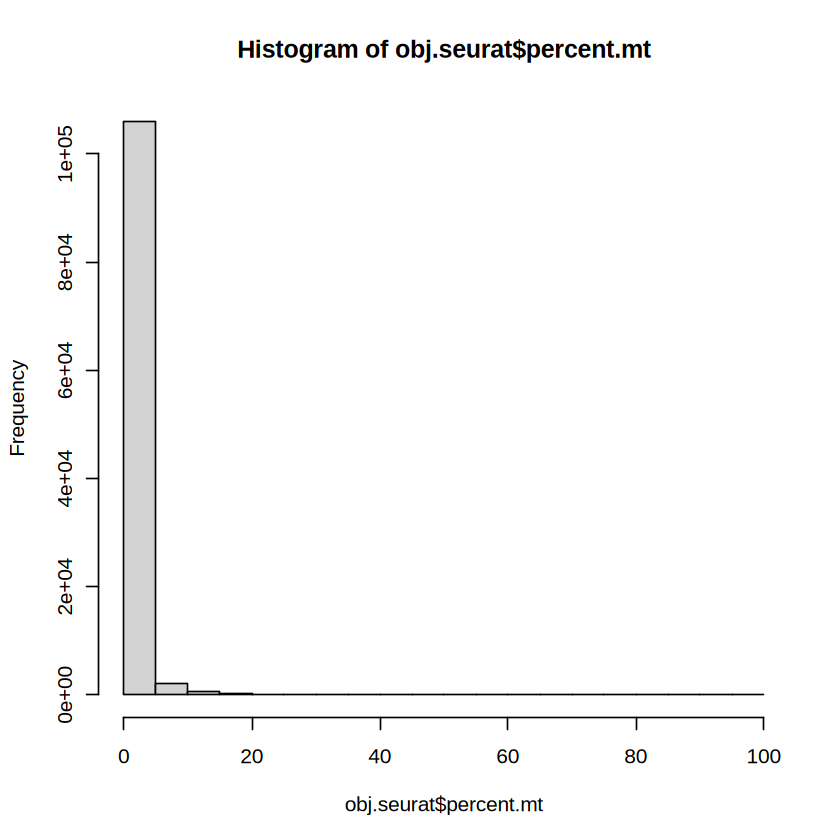

In [18]:
hist(obj.seurat$percent.mt)

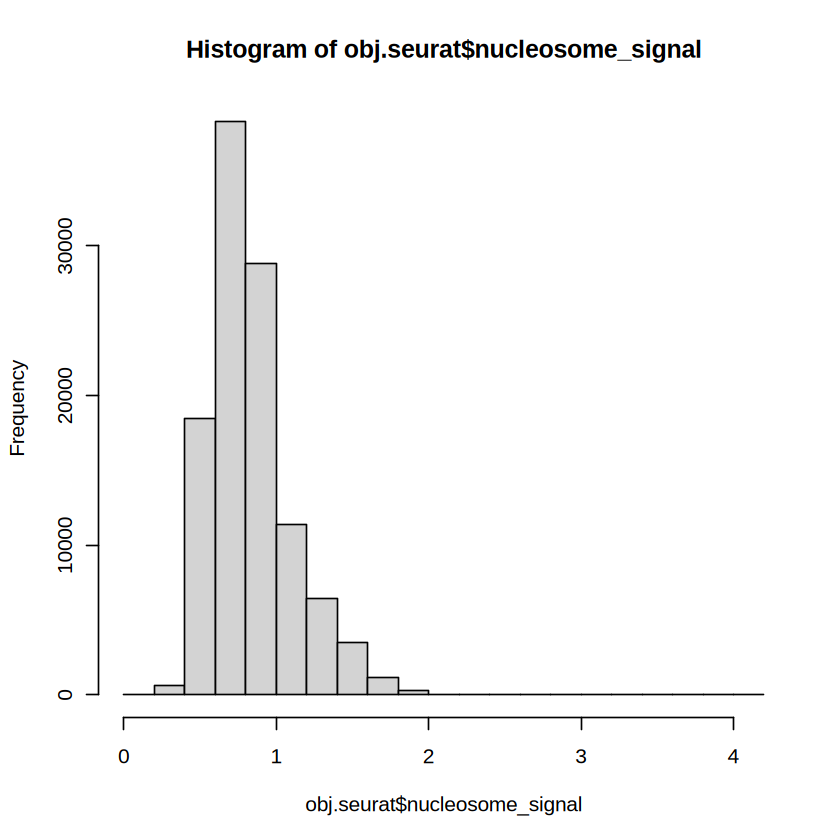

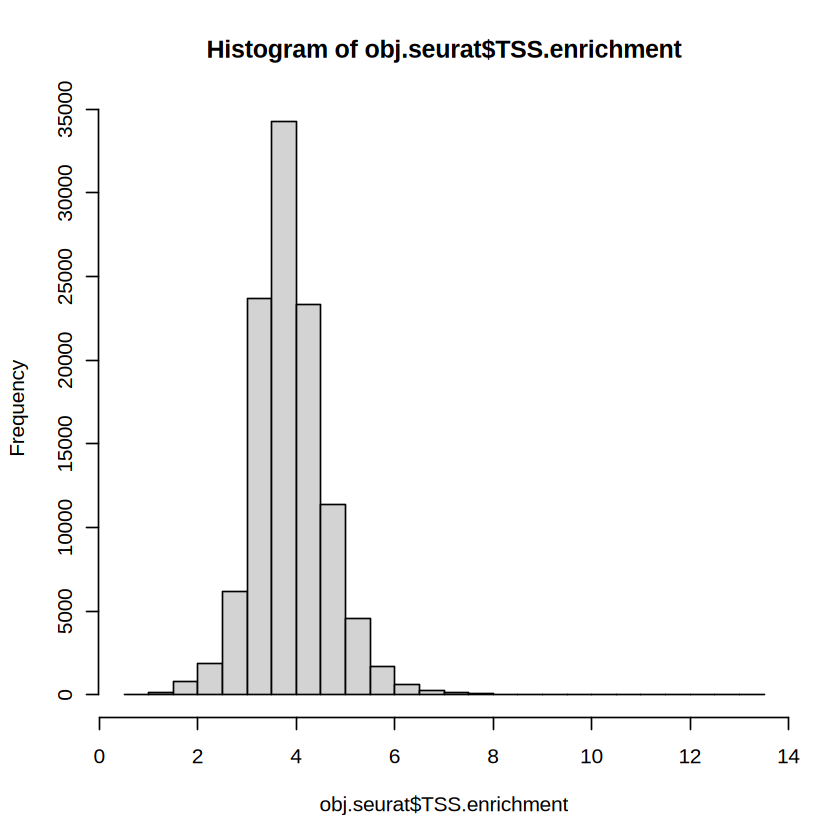

In [19]:
hist(obj.seurat$nucleosome_signal)
hist(obj.seurat$TSS.enrichment)

In [20]:
obj.seurat.qc = subset(obj.seurat,
                       subset = percent.mt < 10 & 
                       nucleosome_signal < 2 & 
                       TSS.enrichment > 2)
obj.seurat.qc

An object of class Seurat 
62760 features across 107224 samples within 2 assays 
Active assay: ATAC_empty (3 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: RNA

In [21]:
summary(obj.seurat.qc$nCount_RNA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1001    2521    4187    4893    6185  116897 

In [22]:
summary(obj.seurat.qc$nFeature_RNA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    390    1424    2014    2095    2578   12426 

In [23]:
summary(obj.seurat.qc$atac_fragments)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1001    9292   17585   19454   26198  658572 

Run UMAP

In [24]:
DefaultAssay(obj.seurat.qc) <- 'RNA'
obj.seurat.qc <- obj.seurat.qc %>%
  NormalizeData() %>%
  FindVariableFeatures() %>%
  ScaleData() %>%
  RunPCA() %>%
  RunUMAP(dims = 1:30)

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  NFIB, MECOM, RASEF, CD44, NR5A2, ZFP36L1, YBX3, CATSPERB, MSC-AS1, TC2N 
	   EGFR, SMAD3, ENSG00000255595, EPS8, FLRT2, TNFAIP8, BCAT1, SVIL, REG1A, SNTB1 
	   ZNF704, MET, OSMR, SPINK1, ANO6, TFPI, PTPN14, PRKG1, MAP3K20, YAP1 
Negative:  EGFEM1P, ROBO2, PLCXD3, ERO1B, CNTN5, CTNNA2, ENPP2, PDE3B, LSAMP, PRUNE2 
	   NRG1, ZNF385D, G6PC2, TRPM3, PPM1E, PAPSS2, FSTL5, ENSG00000233928, HDAC9, DACH2 
	   CPNE4, PDE10A, EDIL3, PTPRD, SLC38A4, POU6F2, SLC35F4, CASR, CDH10, SLC8A1 
PC_ 2 
Positive:  GPC6, ENSG00000233928, PTPRT, POU6F2, FSTL5, SLC35F4, DMD, FAP, KCNJ3, GCG 
	   GLS, SPOCK3, PPP2R2B, PLPPR1, HECW2, MMP16, MYO10, PDE3B, SYNDIG1, GLI3 
	   TTR, SMOC1, PAPPA2, SLC38A4, PLCE1, ENSG00000229425, TMEM236, STK32B, LDB2, LINC02388 
Negative:  TRPM3, ZNF385D, HDAC9, CASR, NRG1, LDLRAD4, MEG3, DACH2, INS, DLG2 
	   PRUNE2, PPM1E, MEG8, KCTD8, HADH, TGFBR3, PDE3A, B

In [25]:
obj.seurat.qc <- obj.seurat.qc %>%
  FindNeighbors(dims = 1:30) %>%
  FindClusters()

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 107224
Number of edges: 3378636

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9078
Number of communities: 34
Elapsed time: 41 seconds


1 singletons identified. 33 final clusters.



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



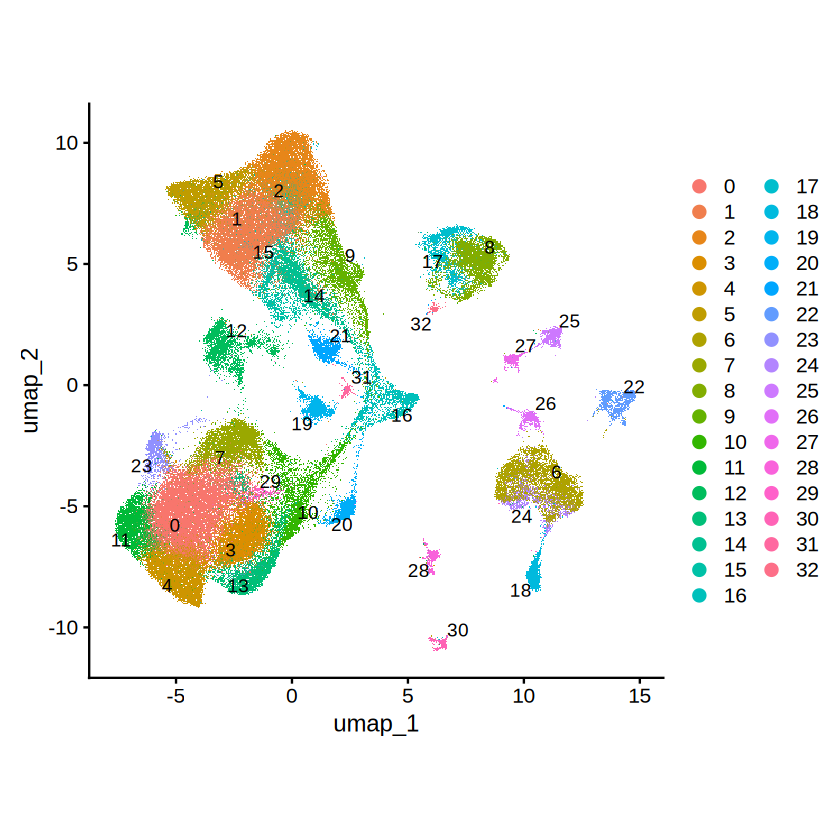

In [26]:
p = DimPlot(obj.seurat.qc, 
        label = TRUE, 
        repel = TRUE, 
        reduction = "umap")  +
  theme(aspect.ratio=1)
p
ggsave("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/output/Islets/1.prepare_data/1.seurat_pipeline.240617/UMAP.RNA.pdf", 
       plot = p, 
       width = 10, height = 8)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


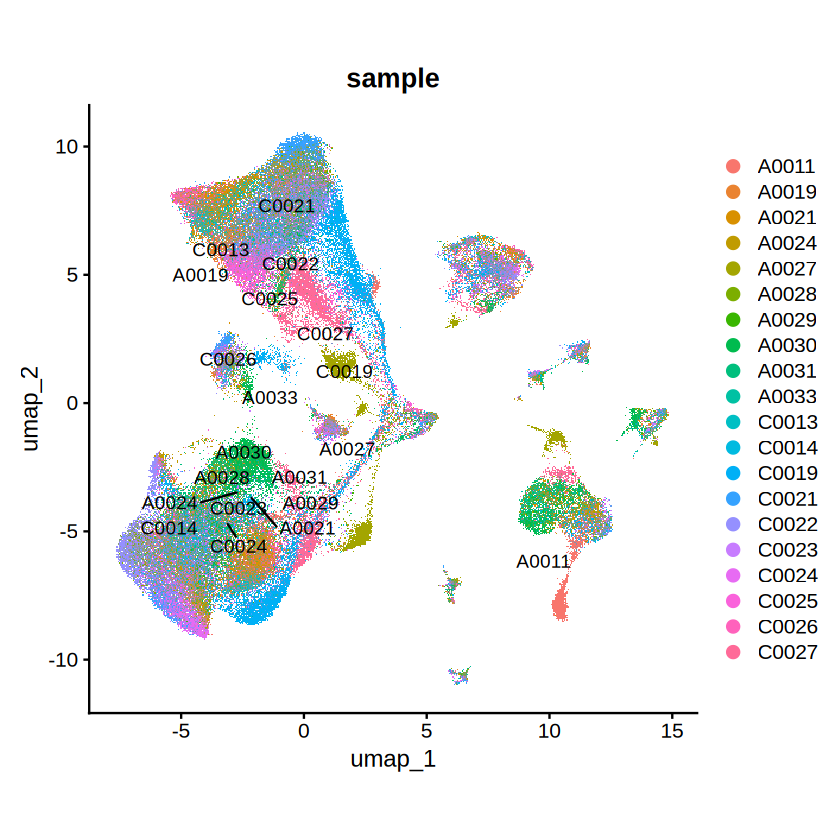

In [27]:
p = DimPlot(obj.seurat.qc, 
            group.by = "sample",
            label = TRUE, 
            repel = TRUE, 
            reduction = "umap")  +
  theme(aspect.ratio=1)
p
ggsave("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/output/Islets/1.prepare_data/1.seurat_pipeline.240617/UMAP.RNA.sample.pdf", 
       plot = p, 
       width = 10, height = 8)

In [28]:
p = FeaturePlot(obj.seurat.qc, 
            features = c("INS", 
                         "GCG", 
                         "SST", 
                         "PPY", 
                         "PECAM1", 
                         "COL3A1", 
                         "ASCL1", 
                         "CFTR",
                         "REG1A", 
                         "PTPRC",
                         "HBA1",
                         "ARX"))
ggsave("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/output/Islets/1.prepare_data/1.seurat_pipeline.240617/UMAP.RNA.marker.pdf", 
       plot = p, 
       width = 25, height = 20)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To di

In [29]:
df.beta_annotation = read.csv("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/GSE200044_multiome_beta_annotation.csv.gz",
                              row.names = 1)
rownames(df.beta_annotation) = df.beta_annotation$X
df.beta_annotation

,X,n_count,n_peak,log10_n_counts,log10_n_peaks,donor,subtype
,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>
A0011_AAACAGCCACTAGGTC-1,A0011_AAACAGCCACTAGGTC-1,34546,16159,4.538398,4.208414,A0011,beta_2
A0011_AAACCAACAAATTGCT-1,A0011_AAACCAACAAATTGCT-1,4358,2343,3.639287,3.369772,A0011,beta_1
A0011_AAACCGAAGCAGGTGG-1,A0011_AAACCGAAGCAGGTGG-1,32518,15309,4.512124,4.184947,A0011,beta_1
A0011_AAACGGATCCTCATCA-1,A0011_AAACGGATCCTCATCA-1,28911,13333,4.461063,4.124928,A0011,beta_1
A0011_AAATCCGGTGCAACTA-1,A0011_AAATCCGGTGCAACTA-1,19578,9742,4.291769,3.988648,A0011,beta_1
A0011_AACAGCAAGCTCGCTT-1,A0011_AACAGCAAGCTCGCTT-1,36126,16614,4.557820,4.220474,A0011,beta_1
A0011_AACATCATCATCAGTA-1,A0011_AACATCATCATCAGTA-1,13027,6553,4.114844,3.816440,A0011,beta_1
A0011_AACCGGCTCTTGTTCG-1,A0011_AACCGGCTCTTGTTCG-1,36492,17594,4.562198,4.245365,A0011,beta_1
A0011_AACCTCACATGATTGT-1,A0011_AACCTCACATGATTGT-1,39690,18936,4.598681,4.277288,A0011,beta_2


In [30]:
obj.seurat.qc$beta_12 = NA
obj.seurat.qc@meta.data[rownames(obj.seurat.qc@meta.data) %in% df.beta_annotation[df.beta_annotation$subtype == "beta_1","X"],"beta_12"] = "beta_1"
obj.seurat.qc@meta.data[rownames(obj.seurat.qc@meta.data) %in% df.beta_annotation[df.beta_annotation$subtype == "beta_2","X"],"beta_12"] = "beta_2"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



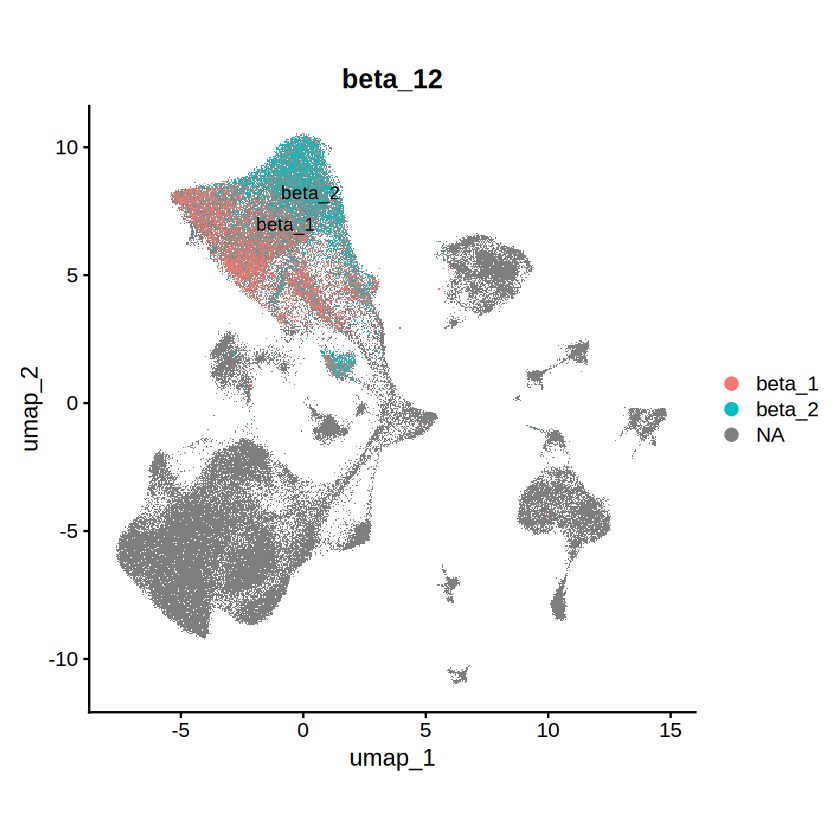

In [31]:
p = DimPlot(obj.seurat.qc, 
            group.by = "beta_12",
            label = TRUE, 
            repel = TRUE, 
            reduction = "umap")  +
  theme(aspect.ratio=1)
p
ggsave("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/output/Islets/1.prepare_data/1.seurat_pipeline.240617/UMAP.RNA.beta_12.pdf", 
       plot = p, 
       width = 10, height = 8)

In [32]:
obj.seurat.qc$atac_fragments.log10 = log10(obj.seurat.qc$atac_fragments)
obj.seurat.qc$gex_umis_count.log10 = log10(obj.seurat.qc$gex_umis_count)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



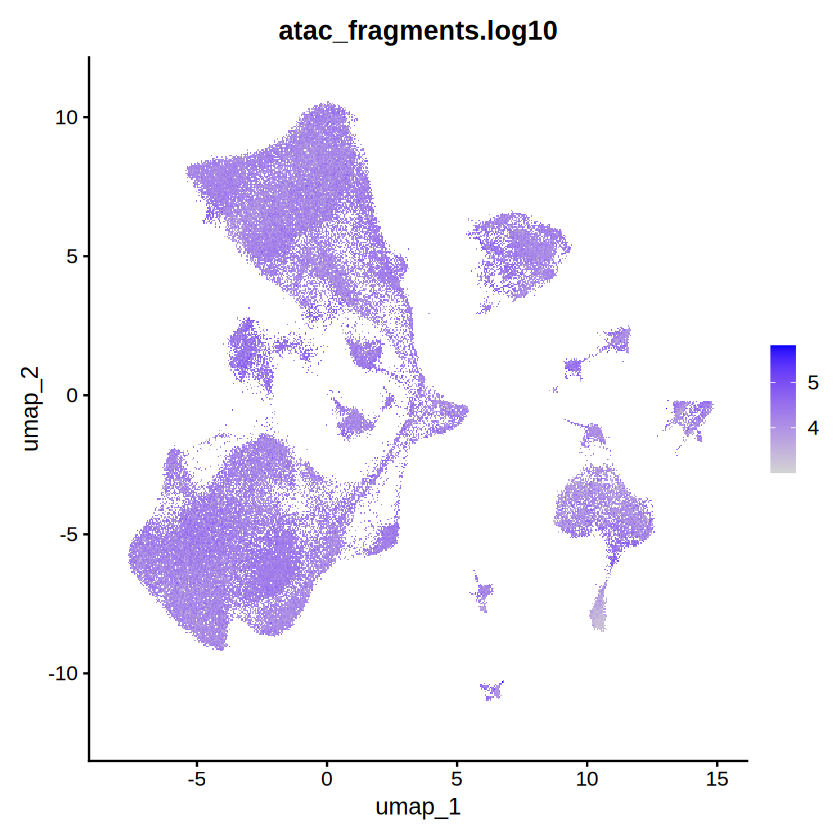

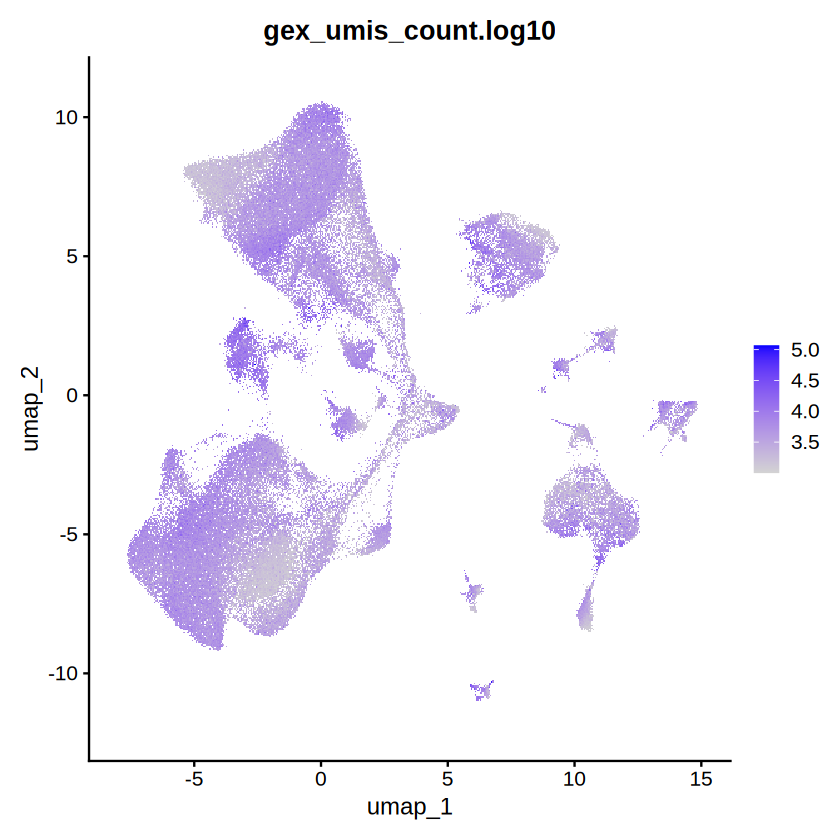

In [33]:
FeaturePlot(obj.seurat.qc, 
            features = c("atac_fragments.log10"))
FeaturePlot(obj.seurat.qc, 
            features = c("gex_umis_count.log10"))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



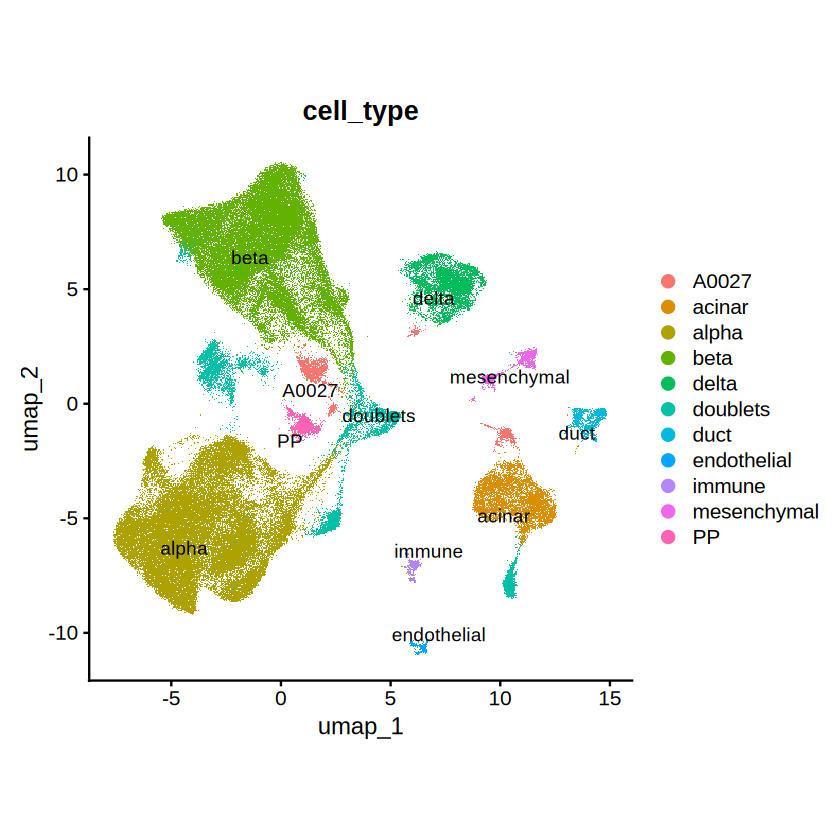

In [34]:
obj.seurat.qc$cell_type = as.character(obj.seurat.qc$RNA_snn_res.0.8)
obj.seurat.qc@meta.data[obj.seurat.qc$cell_type %in% c(1,2,5,9,14,15),"cell_type"] = "beta"
obj.seurat.qc@meta.data[obj.seurat.qc$cell_type %in% c(4,0,7,11,3,29,13,10,23),"cell_type"] = "alpha"
obj.seurat.qc@meta.data[obj.seurat.qc$cell_type %in% c(8,17),"cell_type"] = "delta"
obj.seurat.qc@meta.data[obj.seurat.qc$cell_type %in% c(19),"cell_type"] = "PP"
obj.seurat.qc@meta.data[obj.seurat.qc$cell_type %in% c(22),"cell_type"] = "duct"
obj.seurat.qc@meta.data[obj.seurat.qc$cell_type %in% c(6,24),"cell_type"] = "acinar"
obj.seurat.qc@meta.data[obj.seurat.qc$cell_type %in% c(30),"cell_type"] = "endothelial"
obj.seurat.qc@meta.data[obj.seurat.qc$cell_type %in% c(27,25),"cell_type"] = "mesenchymal"
obj.seurat.qc@meta.data[obj.seurat.qc$cell_type %in% c(28),"cell_type"] = "immune"
obj.seurat.qc@meta.data[obj.seurat.qc$cell_type %in% c(21,32,26,31),"cell_type"] = "A0027"
obj.seurat.qc@meta.data[obj.seurat.qc$cell_type %in% c(16,12,18,20),"cell_type"] = "doublets"
p = DimPlot(obj.seurat.qc, 
            group.by = "cell_type",
            label = TRUE, 
            repel = TRUE, 
            reduction = "umap")  +
  theme(aspect.ratio=1)
p
ggsave("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/output/Islets/1.prepare_data/1.seurat_pipeline.240617/UMAP.RNA.cell_type.pdf", 
       plot = p, 
       width = 10, height = 8)

In [35]:
saveRDS(obj.seurat.qc,
        "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/Islets/1.prepare_data/1.seurat_pipeline.240617/obj.seurat.qc.rds")

In [36]:
obj.seurat.qc2 = subset(obj.seurat.qc,
                        subset = cell_type %in% c("beta",
                                                  "alpha",
                                                  "delta",
                                                  "PP",
                                                  "duct",
                                                  "acinar",
                                                  "endothelial",
                                                  "mesenchymal",
                                                  "immune"))

In [37]:
obj.seurat.qc2

An object of class Seurat 
62760 features across 96367 samples within 2 assays 
Active assay: RNA (62757 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: ATAC_empty
 2 dimensional reductions calculated: pca, umap

In [38]:
DefaultAssay(obj.seurat.qc2) <- 'RNA'
obj.seurat.qc2 <- obj.seurat.qc2 %>%
  NormalizeData() %>%
  FindVariableFeatures() %>%
  ScaleData() %>%
  RunPCA() %>%
  RunUMAP(dims = 1:30)

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
PC_ 1 
Positive:  ROBO2, EGFEM1P, PLCXD3, CPE, LRRTM4, ERO1B, ABCC8, CNTN5, SNTG1, CTNNA2 
	   ANKS1B, NRG1, LSAMP, ZNF385D, ENPP2, PDE3B, PRUNE2, TRPM3, PAPSS2, G6PC2 
	   PPM1E, ROBO1, DACH2, HDAC9, CPNE4, EDIL3, FSTL5, NEGR1, CDH18, INS 
Negative:  NFIB, MECOM, RASEF, CD44, ZFP36L1, NR5A2, YBX3, MSC-AS1, CATSPERB, TC2N 
	   EGFR, EPS8, SMAD3, FLRT2, BCAT1, ENSG00000255595, SVIL, OSMR, TNFAIP8, ZNF704 
	   MET, SNTB1, ANO6, YAP1, PTPN14, SPINK1, MYH9, TFPI, MAP3K20, REG1A 
PC_ 2 
Positive:  GPC6, ENSG00000233928, PTPRT, POU6F2, FSTL5, SLC35F4, DMD, FAP, GCG, KCNJ3 
	   SPOCK3, PPP2R2B, GLS, PLPPR1, HECW2, MMP16, MYO10, ABTB3, PDE3B, SYNDIG1 
	   TTR, SMOC1, GLI3, PAPPA2, ENSG00000229425, SLC38A4, PLCE1, STK32B, TMEM236, LDB2 
Negative:  TRPM3, ZNF385D, HDAC9, CASR, NRG1, LDLRAD4, DACH2, MEG

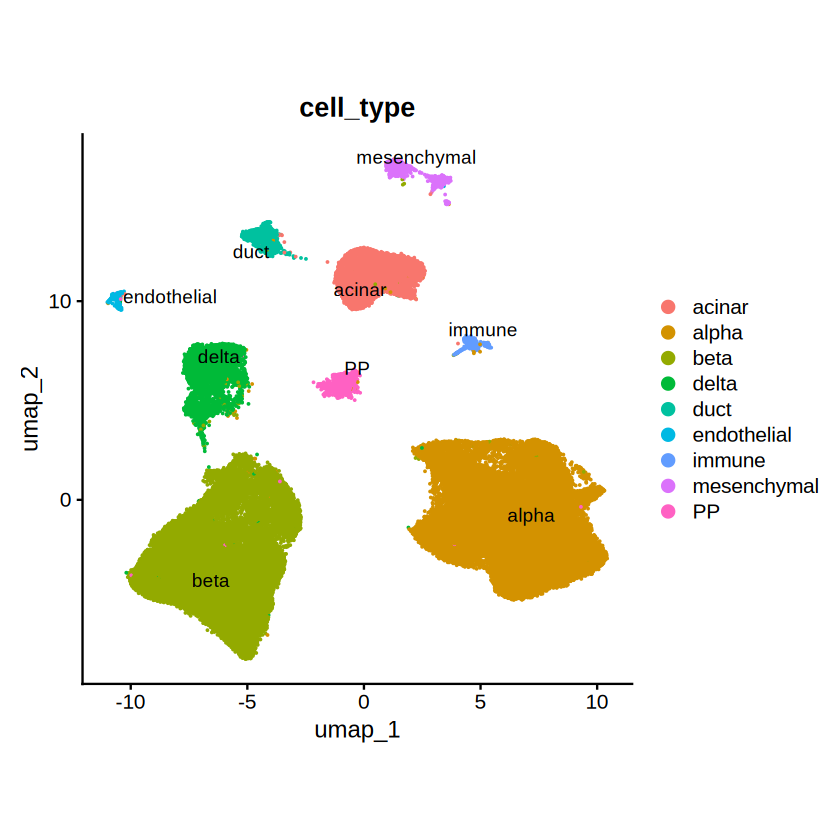

In [39]:
p = DimPlot(obj.seurat.qc2, 
            group.by = "cell_type",
            label = TRUE, 
            repel = TRUE, 
            reduction = "umap")  +
  theme(aspect.ratio=1)
p
ggsave("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/output/Islets/1.prepare_data/1.seurat_pipeline.240617/UMAP.qc2.RNA.cell_type.pdf", 
       plot = p, 
       width = 10, height = 8)

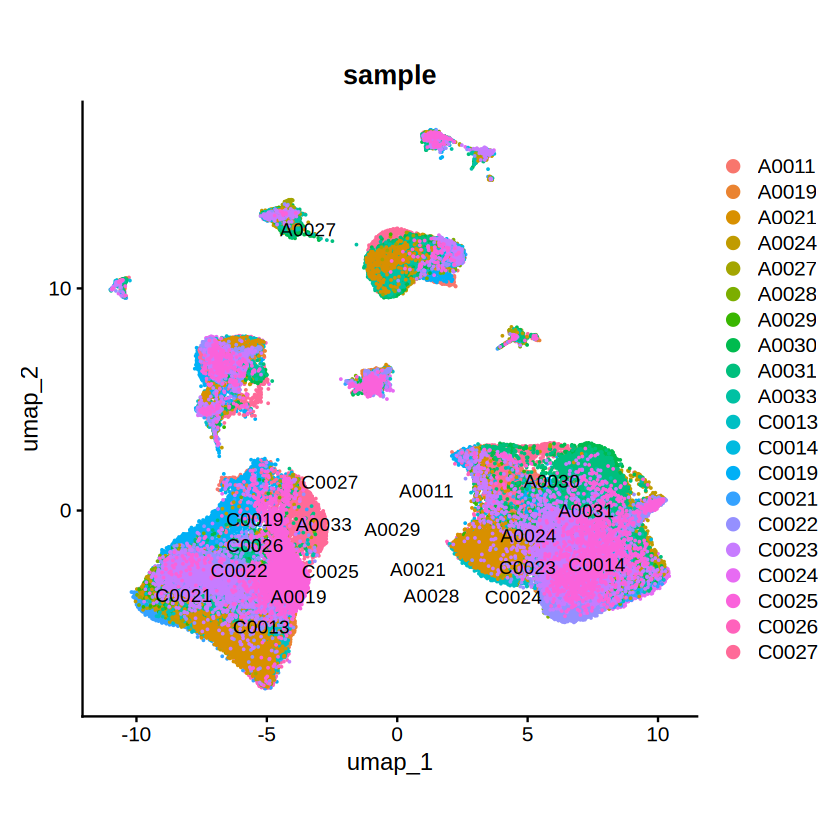

In [40]:
p = DimPlot(obj.seurat.qc2, 
            group.by = "sample",
            label = TRUE, 
            repel = TRUE, 
            reduction = "umap")  +
  theme(aspect.ratio=1)
p
ggsave("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/output/Islets/1.prepare_data/1.seurat_pipeline.240617/UMAP.qc2.RNA.sample.pdf", 
       plot = p, 
       width = 10, height = 8)

In [41]:
p = FeaturePlot(obj.seurat.qc2, 
            features = c("INS", 
                         "GCG", 
                         "SST", 
                         "PPY", 
                         "PECAM1", 
                         "COL3A1", 
                         "ASCL1", 
                         "CFTR",
                         "REG1A", 
                         "PTPRC",
                         "HBA1",
                         "ARX"))
ggsave("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/output/Islets/1.prepare_data/1.seurat_pipeline.240617/UMAP.qc2.RNA.marker.pdf", 
       plot = p, 
       width = 25, height = 20)

Warning message:
“All cells have the same value (0) of “HBA1””


In [42]:
obj.seurat.qc2

An object of class Seurat 
62760 features across 96367 samples within 2 assays 
Active assay: RNA (62757 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: ATAC_empty
 2 dimensional reductions calculated: pca, umap

In [43]:
table(obj.seurat.qc2$cell_type)


     acinar       alpha        beta       delta        duct endothelial 
       6119       42072       36704        6216        1320         416 
     immune mesenchymal          PP 
        537        1445        1538 

In [44]:
summary(obj.seurat.qc2$nCount_RNA) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1001    2528    4173    4788    6096  111572 

In [45]:
summary(obj.seurat.qc2$nFeature_RNA) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    390    1417    1998    2062    2541   12114 

In [46]:
summary(obj.seurat.qc2$atac_fragments)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1001    9448   17414   19036   25634  658572 

In [47]:
saveRDS(obj.seurat.qc2,
        "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/Islets/1.prepare_data/1.seurat_pipeline.240617/obj.seurat.qc2.rds")

Generate fragment files for each cell type

In [86]:
dir_path.frag_split = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/Islets/1.prepare_data/1.seurat_pipeline.240617/fragments_split/"
Signac::SplitFragments(obj.seurat.qc2,
                      assay = "ATAC_empty",
                      group.by = "cell_type",
                      append = F,
                      outdir = dir_path.frag_split)

Processing file /maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1613/outs/atac_fragments.tsv.gz




Processing file /maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1608/outs/atac_fragments.tsv.gz




Processing file /maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1695/outs/atac_fragments.tsv.gz




Processing file /maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1605/outs/atac_fragments.tsv.gz




Processing file /maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancreatic_islets/cellranger_res/SAMP_1696/outs/atac_fragments.tsv.gz




Processing file /maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240503/pancre

In [56]:
cell_types = unique(obj.seurat.qc2$cell_type)
my.cluster <- parallel::makeCluster(
  20,
  type = "PSOCK"
)
doParallel::registerDoParallel(cl = my.cluster)
foreach (n.tmp = 1:length(names.sample)) %dopar% {
  for(name.cell_type in cell_types) {
    cat(name.cell_type,n.tmp,"\n")
    
    path.frag.input = paste(dir_path.frag_split,
                          "/",
                          name.cell_type,
                          ".",
                          n.tmp,
                          ".bed",
                          sep = "")
    path.frag.output = paste(dir_path.frag_split,
                          "/",
                          name.cell_type,
                          ".",
                          n.tmp,
                          ".bed.gz",
                          sep = "")
    if (file.info(path.frag.input)$size > 0) {
      df.frag = 
        read.delim(path.frag.input,
                   header = F)
      df.frag[,4] = paste(names.sample[n.tmp],
                          df.frag[,4],
                          sep = "_")
      write.table(df.frag,
              gzfile(path.frag.output),
              col.names = F,
              row.names = F,
              quote = F,
              sep = "\t")

    }
  }
}
parallel::stopCluster(cl = my.cluster)

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

[[16]]
NULL

[[17]]
NULL

[[18]]
NULL

[[19]]
NULL

[[20]]
NULL

Generate RNA count matrix for each cell type

In [49]:
dir_path.rna_matrix = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503//data/Islets/1.prepare_data/1.seurat_pipeline.240617/RNA_count_matrix/"

for(name.cell_type in unique(obj.seurat.qc2$cell_type)){
  matrix.tmp = 
    obj.seurat.qc2@assays$RNA$count[,obj.seurat.qc2$cell_type == name.cell_type]
  write.csv(as.data.frame(matrix.tmp),
            gzfile(paste(dir_path.rna_matrix,
                         "/",
                         name.cell_type,
                         ".rna_count_matrix.csv.gz",
                        sep = "")),
            quote = F)
}

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 19.7 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 17.2 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.9 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.9 GiB”


In [50]:
write.csv(t(as.data.frame(obj.seurat.qc2@assays$RNA$count)),
          gzfile("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503//data/Islets/1.prepare_data/1.seurat_pipeline.240617/rna_count_matrix.t.csv.gz"),
          quote = F)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 45.1 GiB”


In [51]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.9 (Ootpa)

Matrix products: default
BLAS/LAPACK: /maps/projects/ralab/people/lpm537/software/anaconda3/envs/Notebook_E2G_240505/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Copenhagen
tzcode source: system (glibc)

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] Rsamtools_2.18.0     Biostrings_2.70.1    XVector_0.42.0      
 [4] GenomicRanges_1.54.1 GenomeInfoDb_1.38.1  IRanges_2.36.0      

In [2]:
obj.seurat.qc2 = readRDS("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/Islets/1.prepare_data/1.seurat_pipeline.240617/obj.seurat.qc2.rds")

In [3]:
df.cell_type = data.frame(cell_type = names(table(obj.seurat.qc2$cell_type)),
                          cell_number = table(obj.seurat.qc2$cell_type),
                          total_fragment_count = NA,
                          total_UMI_count = NA)
rownames(df.cell_type) = df.cell_type$cell_type

for(cell_type.tmp in df.cell_type$cell_type){
    cell_names.tmp = colnames(obj.seurat.qc2)[obj.seurat.qc2@meta.data$cell_type == cell_type.tmp]
    df.cell_type[cell_type.tmp,"total_fragment_count"] = sum(obj.seurat.qc2@meta.data[cell_names.tmp,"atac_fragments"])
    df.cell_type[cell_type.tmp,"total_UMI_count"] = sum(obj.seurat.qc2@meta.data[cell_names.tmp,"gex_umis_count"])
}

df.cell_type$mean_fragment_count = round(df.cell_type$total_fragment_count / df.cell_type$cell_number.Freq,0)
df.cell_type$mean_UMI_count = round(df.cell_type$total_UMI_count / df.cell_type$cell_number.Freq,0)

In [4]:
write.csv(df.cell_type,
          "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/Islets/1.prepare_data/1.seurat_pipeline.240617/df.cell_type.csv")